## Exploratory Data Analysis

### 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis

### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones

### 3. Handling Outliers
1. Detect Outliers
2. Remove Outliers


In [8]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importing the dataset
df=pd.read_csv('train.csv')

In [11]:
# Shape
df.shape

(891, 12)

In [12]:
# Previewing the data
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [13]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Categorical Columns

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

## Numerical Columns

- Age
- Fare
- PassengerId

## Mixed Columns

- Name
- Ticket
- Cabin

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:

df.drop(columns=['Cabin'],inplace=True)

In [18]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-18-1152071244.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [19]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

/tmp/ipython-input-19-710581384.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [20]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [21]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [22]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [24]:
# Five point summary
df.describe()

PassengerId         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000   29.544332    0.523008    0.381594   32.204208
std     257.353842   13.013778    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.000000    0.000000    0.000000
25%     223.500000   22.000000    0.000000    0.000000    7.910400
50%     446.000000   29.000000    0.000000    0.000000   14.454200
75%     668.500000   35.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200

Out of 891 62 people died in the accident


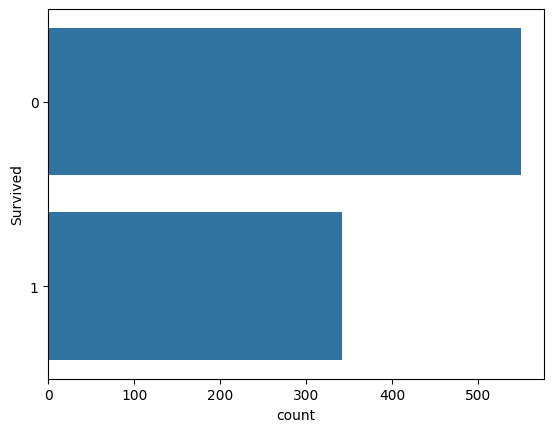

In [25]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

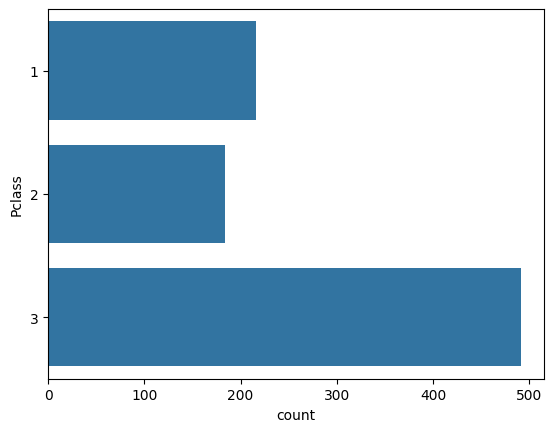

In [26]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

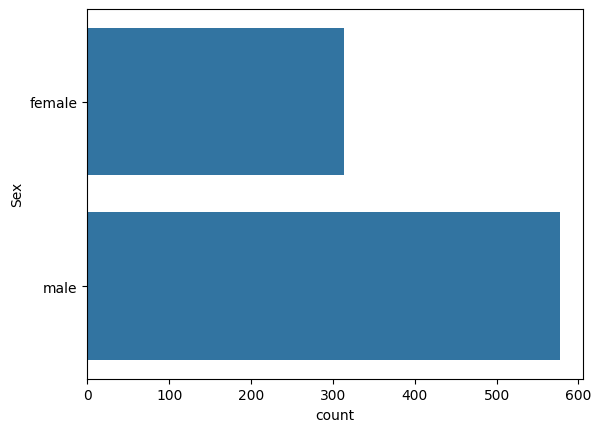

In [27]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: ylabel='count'>

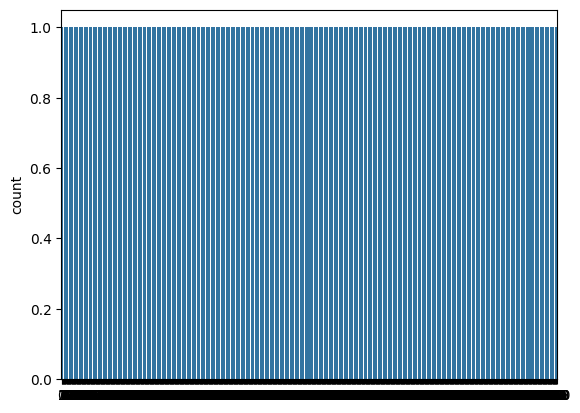

In [28]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

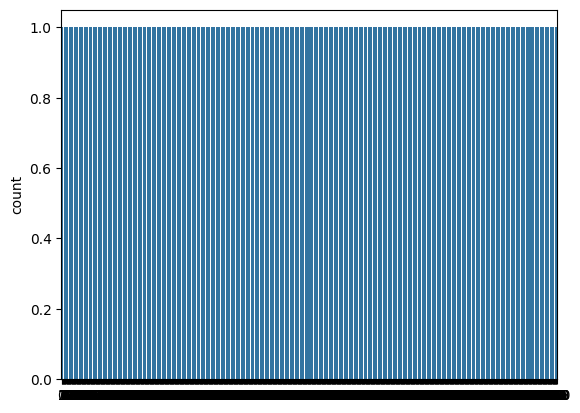

In [29]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

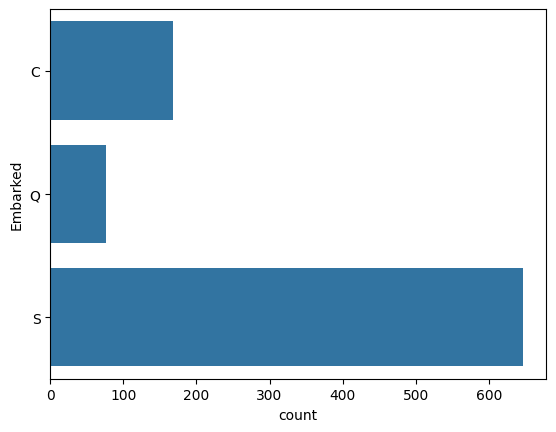

In [30]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

0.45956263424701577


/tmp/ipython-input-31-747997586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.9865867453652877


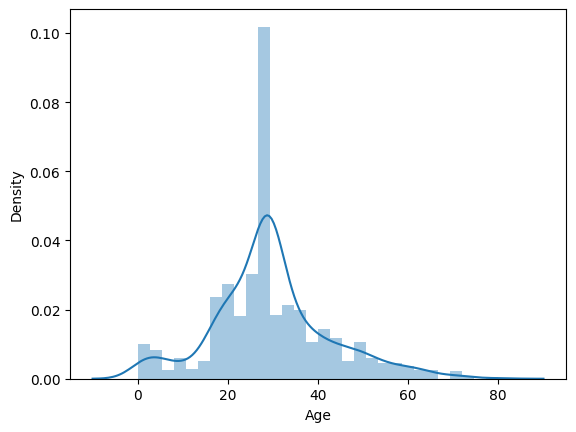

In [31]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: ylabel='Age'>

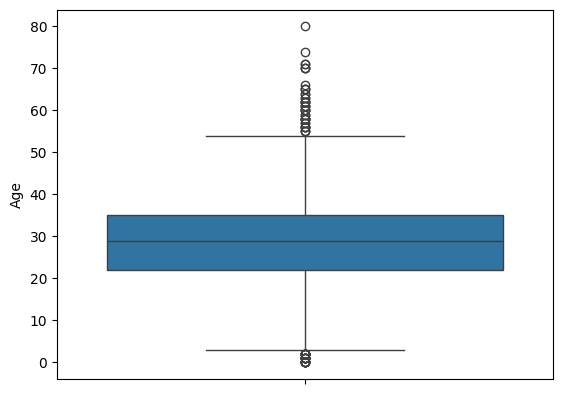

In [32]:
sns.boxplot(df['Age'])

In [33]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


## Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2

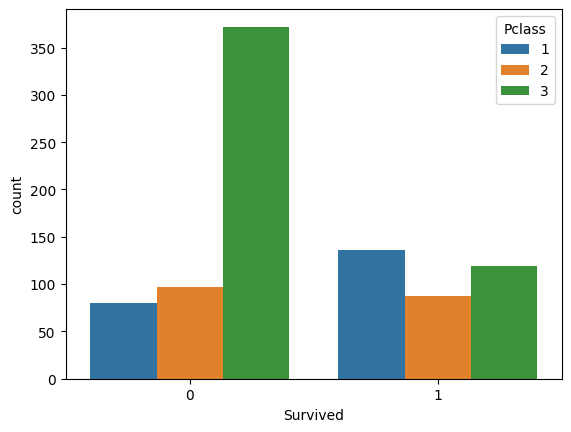

In [40]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(data=df, x='Survived', hue='Pclass')

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9

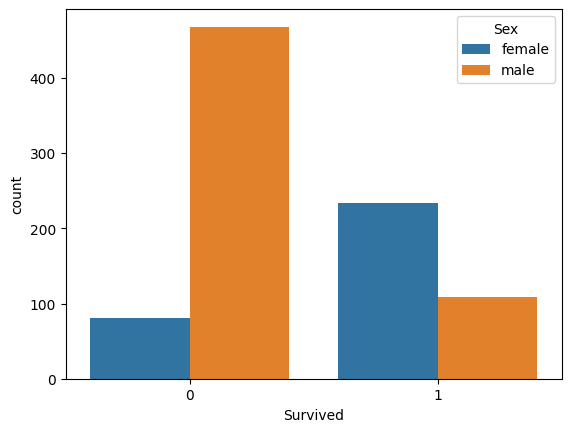

In [43]:
# Survival with Sex

sns.countplot(data=df, x='Survived', hue='Sex')

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9

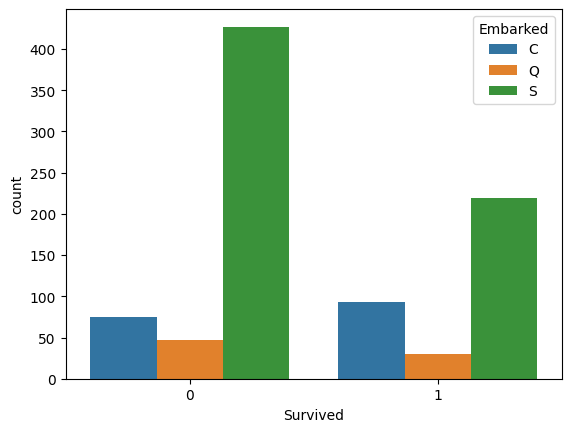

In [45]:
# Survival with Embarked

sns.countplot(data=df, x=df['Survived'], hue=df['Embarked'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

/tmp/ipython-input-46-4035758269.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
/tmp/ipython-input-46-4035758269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

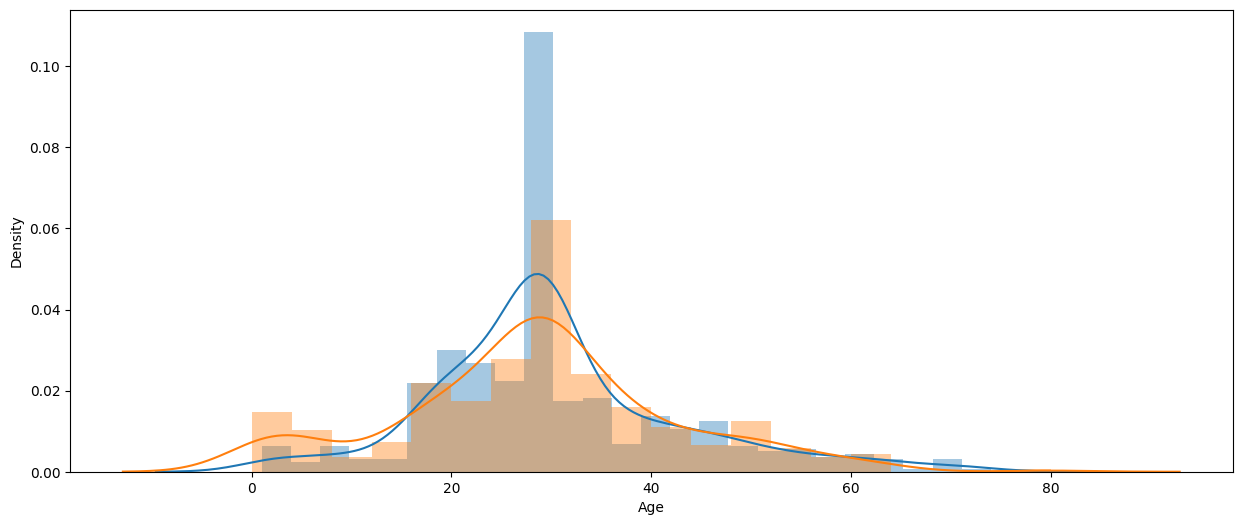

In [46]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

/tmp/ipython-input-47-1917301903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
/tmp/ipython-input-47-1917301903.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

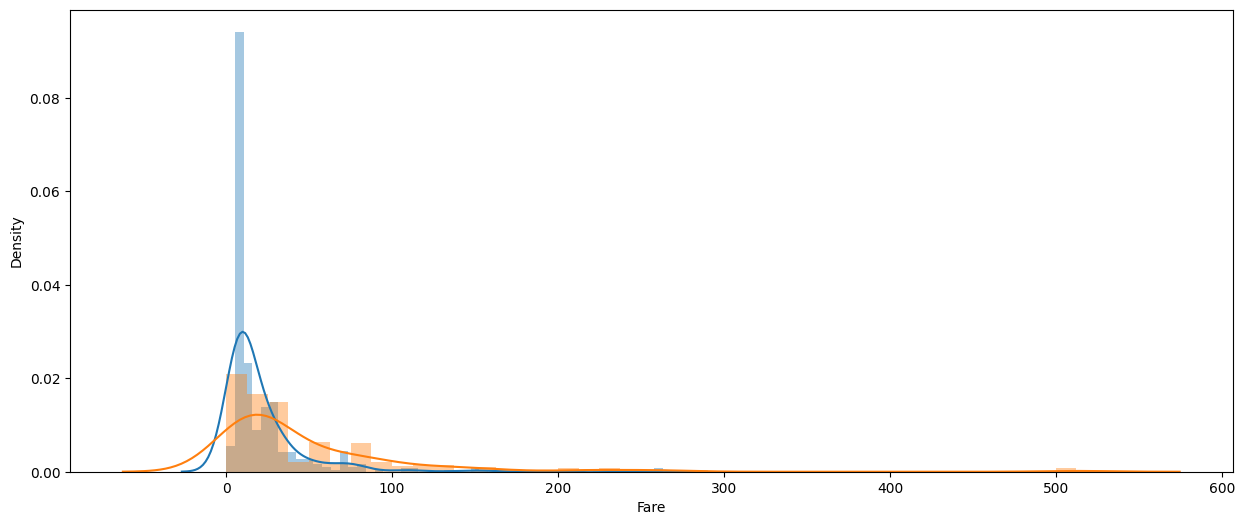

In [47]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

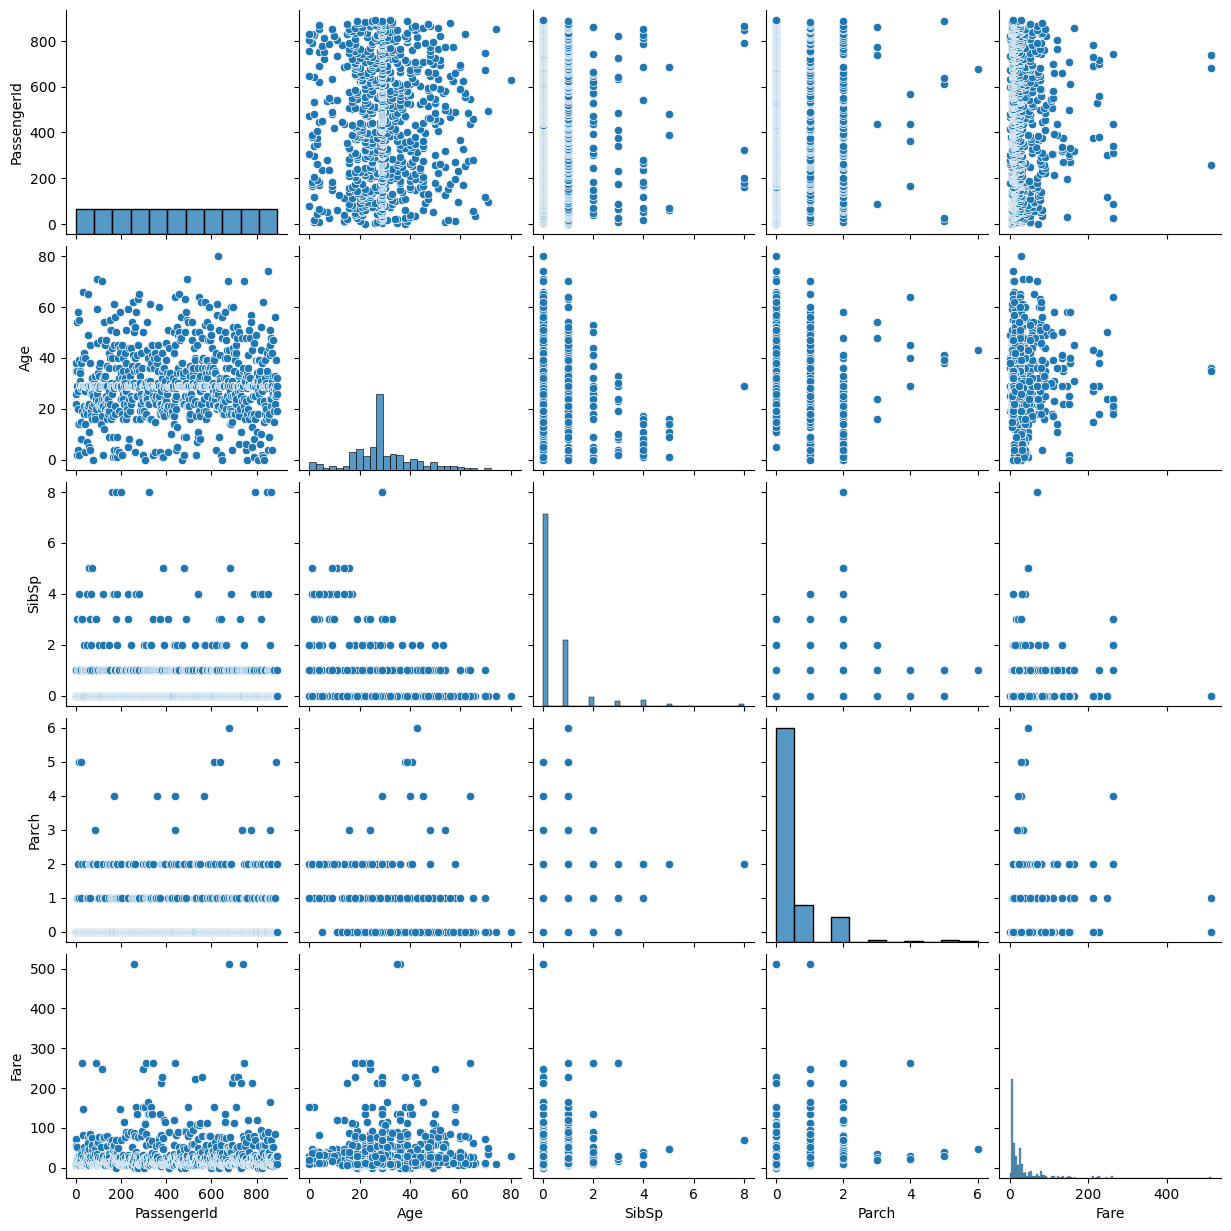

In [48]:
sns.pairplot(df)

<Axes: >

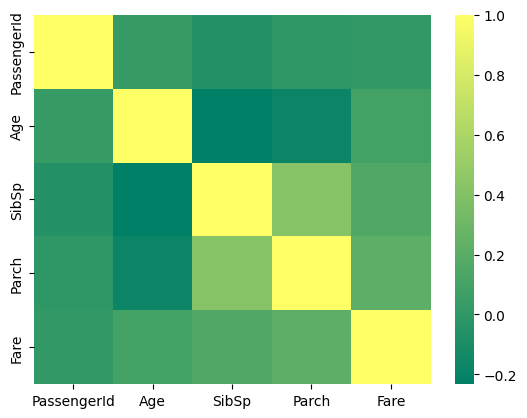

In [50]:
# Calculate the correlation matrix only for numerical columns
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), cmap='summer')

In [51]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [52]:
df.sample(5)

PassengerId Survived Pclass  \
215          216        1      1   
266          267        0      3   
879          880        1      1   
600          601        1      2   
101          102        0      3   

                                                  Name     Sex  Age  SibSp  \
215                            Newell, Miss. Madeleine  female   31      1   
266                          Panula, Mr. Ernesti Arvid    male   16      4   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female   56      0   
600  Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...  female   24      2   
101                   Petroff, Mr. Pastcho ("Pentcho")    male   29      0   

     Parch   Ticket      Fare Embarked  family_size  
215      0    35273  113.2750        C            1  
266      1  3101295   39.6875        S            5  
879      1    11767   83.1583        C            1  
600      1   243847   27.0000        S            3  
101      0   349215    7.8958        S            0

In [53]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [54]:
df['family_type']=df['family_size'].apply(family_type)

In [55]:
df.sample(5)

PassengerId Survived Pclass                        Name   Sex  Age  \
400          401        1      3          Niskanen, Mr. Juha  male   39   
804          805        1      3     Hedman, Mr. Oskar Arvid  male   27   
821          822        1      3           Lulic, Mr. Nikola  male   27   
639          640        0      3  Thorneycroft, Mr. Percival  male   29   
493          494        0      1     Artagaveytia, Mr. Ramon  male   71   

     SibSp  Parch             Ticket     Fare Embarked  family_size  \
400      0      0  STON/O 2. 3101289   7.9250        S            0   
804      0      0             347089   6.9750        S            0   
821      0      0             315098   8.6625        S            0   
639      1      0             376564  16.1000        S            1   
493      0      0           PC 17609  49.5042        C            0   

    family_type  
400       Alone  
804       Alone  
821       Alone  
639      Medium  
493       Alone

In [56]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [57]:
df.sample(5)

PassengerId Survived Pclass  \
268          269        1      1   
348          349        1      3   
725          726        0      3   
456          457        0      1   
304          305        0      3   

                                              Name     Sex  Age      Ticket  \
268  Graham, Mrs. William Thompson (Edith Junkins)  female   58    PC 17582   
348         Coutts, Master. William Loch "William"    male    3  C.A. 37671   
725                            Oreskovic, Mr. Luka    male   20      315094   
456                      Millet, Mr. Francis Davis    male   65       13509   
304              Williams, Mr. Howard Hugh "Harry"    male   29    A/5 2466   

         Fare Embarked family_type  
268  153.4625        S      Medium  
348   15.9000        S      Medium  
725    8.6625        S       Alone  
456   26.5500        S       Alone  
304    8.0500        S       Alone

In [58]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived        0     1
family_type            
Alone        69.6  30.4
Large        85.1  14.9
Medium       44.0  56.0

## Detecting outliers

### Numerical Data
- if the data is following normal distribution, anything beyond   3*SD - mean + 3*SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [59]:
# handling outliers in age(Almost normal)


df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [60]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [62]:

df.sample(4)
pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

PassengerId Survived                                          Name  Age  \
0              1        0                       Braund, Mr. Owen Harris   22   
2              3        1                        Heikkinen, Miss. Laina   26   
3              4        1  Futrelle, Mrs. Jacques Heath (Lily May Peel)   35   
4              5        0                      Allen, Mr. William Henry   35   
5              6        0                              Moran, Mr. James   29   
..           ...      ...                                           ...  ...   
886          887        0                         Montvila, Rev. Juozas   27   
887          888        1                  Graham, Miss. Margaret Edith   19   
888          889        0      Johnston, Miss. Catherine Helen "Carrie"   29   
889          890        1                         Behr, Mr. Karl Howell   26   
890          891        0                           Dooley, Mr. Patrick   32   

               Ticket     Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
0           A/5 21171   7.2500     False      True      True       False   
2    STON/O2. 3101282   7.9250     False      True     False       False   
3              113803  53.1000     False     False     False       False   
4              373450   8.0500     False      True      True       False   
5              330877   8.4583     False      True      True        True   
..                ...      ...       ...       ...       ...         ...   
886            211536  13.0000      True     False      True       False   
887            112053  30.0000     False     False     False       False   
888        W./C. 6607  23.4500     False      True     False       False   
889            111369  30.0000     False     False      True       False   
890            370376   7.7500     False      True      True        True   

     Embarked_S  family_type_Large  family_type_Medium  
0          True              False                True  
2          True              False               False  
3          True              False                True  
4          True              False               False  
5         False              False               False  
..          ...                ...                 ...  
886        True              False               False  
887        True              False               False  
888        True              False                True  
889       False              False               False  
890       False              False               False  

[769 rows x 13 columns]

In [63]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

<Axes: >

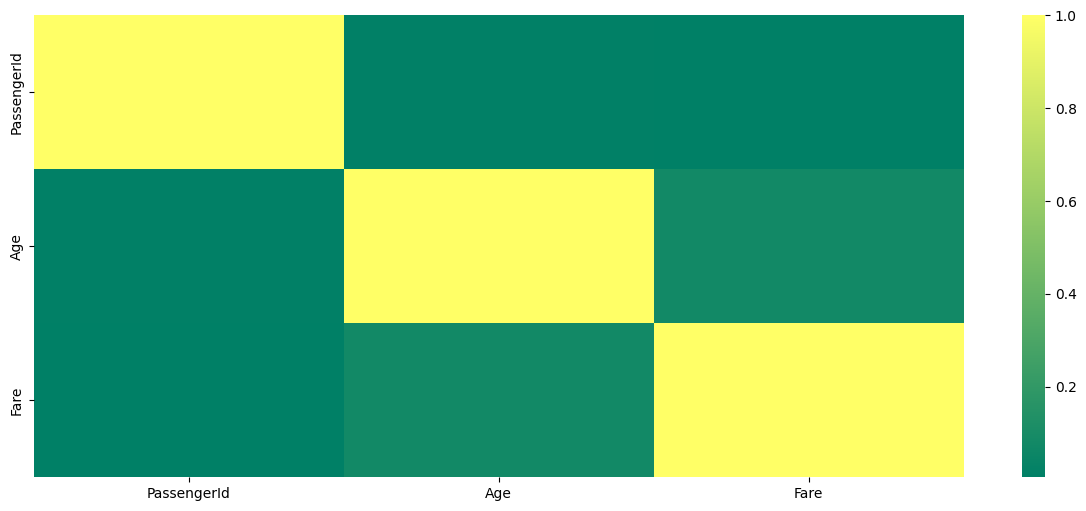

In [65]:
plt.figure(figsize=(15,6))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), cmap='summer')